# Assigment 1

Import packages 

In [76]:
# Remember to pip install opencv-pyhton
import os
import sys
sys.path.append(os.path.join("..", "..", "..", "CDS-VIS"))
import cv2
import numpy as np
import pandas as pd
import glob
from utils.imutils import jimshow
from utils.imutils import jimshow_channel
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Import files

In [2]:
os.getcwd()

'/work/cds-visual/Assignment_1/visual_analytics_A1'

In [64]:
path_to_flower = os.path.join("..", "..", "..", "CDS-VIS", "flowers")
file_list = os.listdir(path_to_flower)
len(file_list)

1361

In [66]:
# removing '.ipynb_checkpoints'
flower_list = list(filter(lambda x: x.startswith("image"), file_list))
len(flower_list)

1360

Create a loop

In [68]:
# Define a flower separately
reference = flower_list[0]
reference_img = cv2.imread(os.path.join(path_to_flower, reference))
# Calculating histogram
ref_histogram = cv2.calcHist([reference_img], [0,1,2], None, [8,8,8], [0,256, 0,256, 0,256])
# Normalize histogram
ref_histogram_norm = cv2.normalize(ref_histogram, ref_histogram, 0, 255, cv2.NORM_MINMAX)

# Define empthy list 
comparisons = []

# For-loop for comparison
for flower in flower_list: 
    if flower == reference: 
        pass
    else: 
        # Load image
        image = cv2.imread(os.path.join(path_to_flower, flower))
        # Calculate histogram
        histogram = cv2.calcHist([image], [0,1,2], None, [8,8,8], [0,256, 0,256, 0,256])
        # Normalize histogram
        histogram_norm = cv2.normalize(histogram, histogram, 0, 255, cv2.NORM_MINMAX)
        # Compare histograms
        value = cv2.compareHist(ref_histogram_norm, histogram_norm, cv2.HISTCMP_CHISQR)
        # Save output
        comparisons.append((flower, value))

Find the 3 most similar images 

In [71]:
# Check variable
print(comparisons[0:10])

[('image_0772.jpg', 134856.08877627648), ('image_1307.jpg', 148437.22539611504), ('image_0127.jpg', 12204.67767971071), ('image_0479.jpg', 500982.784306902), ('image_1250.jpg', 136793.14257890536), ('image_0948.jpg', 3341.424830865154), ('image_0964.jpg', 5293.390894943013), ('image_0953.jpg', 44567.67907743659), ('image_0151.jpg', 27763.729243874754), ('image_0973.jpg', 210363.93363690568)]


In [72]:
# Sorting comparisons
sort_comparisons = sorted(comparisons, key=lambda x: x[1])
print(sort_comparisons[0:10])

[('image_0228.jpg', 2788.7622213151176), ('image_0626.jpg', 2837.7348279557564), ('image_0057.jpg', 2932.716481241028), ('image_0077.jpg', 2992.2398042843724), ('image_0602.jpg', 3019.630879676483), ('image_0638.jpg', 3077.0746034800854), ('image_0537.jpg', 3096.639038347231), ('image_0588.jpg', 3139.21004857859), ('image_1126.jpg', 3204.078024259898), ('image_0040.jpg', 3213.927813003522)]


Create dataframe

In [73]:
data = (reference, sort_comparisons[0][0], sort_comparisons[1][0], sort_comparisons[2][0])

In [74]:
df = pd.DataFrame([data], columns=["reference", "first", "second", "third"])

In [75]:
df.head()

,reference,first,second,third
0,image_1079.jpg,image_0228.jpg,image_0626.jpg,image_0057.jpg


Create Image

In [77]:
# Load correct images (rgb, not bgr)
rgb_reference = mpimg.imread(os.path.join(path_to_flower, df["reference"][0]))
rgb_first = mpimg.imread(os.path.join(path_to_flower, df["first"][0]))
rgb_second = mpimg.imread(os.path.join(path_to_flower, df["second"][0]))
rgb_third = mpimg.imread(os.path.join(path_to_flower, df["third"][0]))


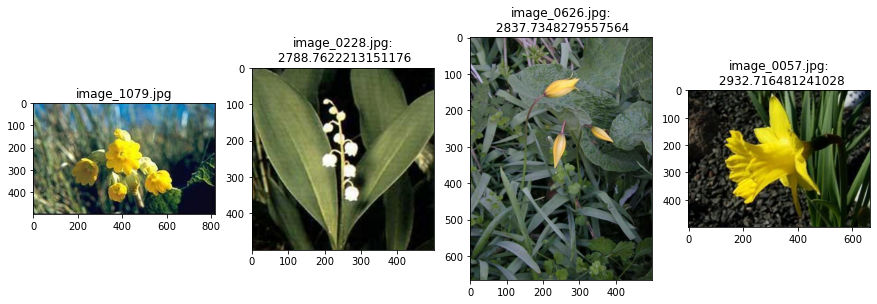

In [84]:
# Create plot
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15,15))
ax1.imshow(rgb_reference)
ax1.set_title(f'{df["reference"][0]}')
ax2.imshow(rgb_first)
ax2.set_title(f'{df["first"][0]}:\n {sort_comparisons[0][1]}')
ax3.imshow(rgb_second)
ax3.set_title(f'{df["second"][0]}:\n {sort_comparisons[1][1]}')
ax4.imshow(rgb_third)
ax4.set_title(f'{df["third"][0]}:\n {sort_comparisons[2][1]}')

# Saving image
plt.savefig(os.path.join("output", "comparison_img.png"))

Save CSV

In [85]:
# Saving CSV
outpath = os.path.join("output", "comparison_df.csv")
df.to_csv(outpath, index=False)